<a href="https://colab.research.google.com/github/Vertex138/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Colin_Brinkley_Submission_LS_DS_113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [1]:
#First, Revert to the version of Pandas where pd.cut actually works
!pip install pandas==0.23.4

In [2]:
#Import the CSV, remove the first, unneeded column
import pandas as pd
personData = pd.read_csv('https://raw.githubusercontent.com/Vertex138/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
personData = personData.drop(personData.columns[0], axis=1)
personData.head(10)

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182
5,58,103,165
6,55,161,107
7,21,188,37
8,55,216,79
9,50,127,267


In [50]:
#Binning the individuals by age, weight and excersise time
personCrosstab = pd.crosstab(personData['weight'], personData['exercise_time'])

#That's a lot of scattered data, oh my. Binning time!
personAgeBins = pd.cut(personData['age'],4)
personWeightBins = pd.cut(personData['weight'],10)
personTimeBins = pd.cut(personData['exercise_time'],5)

#Let's try looking at it now.
pd.crosstab(personWeightBins, [personAgeBins, personTimeBins])

age             (17.938, 33.5]      ...         (64.5, 80.0]
exercise_time     (-0.3, 60.0]      ...       (240.0, 300.0]
weight                              ...                     
(99.854, 114.6]              4      ...                    0
(114.6, 129.2]               7      ...                    1
(129.2, 143.8]               4      ...                    0
(143.8, 158.4]               5      ...                    0
(158.4, 173.0]               7      ...                    0
(173.0, 187.6]               7      ...                    0
(187.6, 202.2]               7      ...                    0
(202.2, 216.8]              13      ...                    0
(216.8, 231.4]               7      ...                    0
(231.4, 246.0]               3      ...                    0

[10 rows x 20 columns]

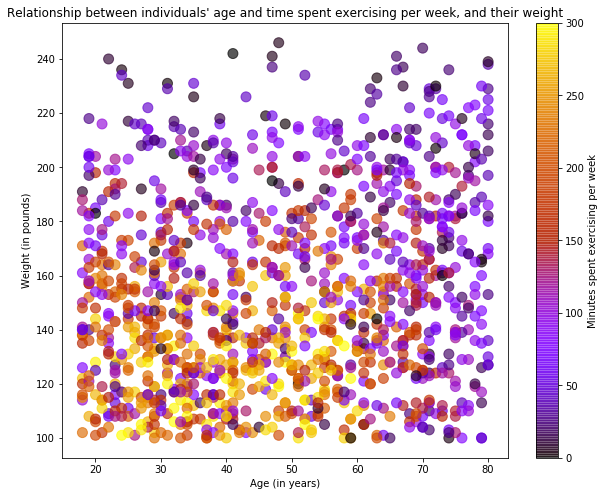

In [76]:
#Now let's try making a scatterplot where: x = Age, y = Weight, and color = Time spent excersising
import matplotlib.pyplot as plt

#Define Graph and it's size
fig, personScatter = plt.subplots()
fig.set_size_inches(10, 8)

#Set the color relative to the time spent exercising
c = personData['exercise_time']

#Create labels and title
personScatter.set_xlabel('Age (in years)')
personScatter.set_ylabel('Weight (in pounds)')
personScatter.set_title('Relationship between individuals\' age and time spent exercising per week, and their weight')

#Draw the graph using the colormap 'gnuplot'
personScatter = plt.scatter(personData['age'], personData['weight'], c=c, cmap='gnuplot', s=100, alpha=0.65)

#Draws the guide for the color
timeBar = plt.colorbar()
timeBar.set_label('Minutes spent exercising per week')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

    **The age is an indepentant variable, while the weight and exercising times are dependent variables**
    
2.  What are the relationships between the variables?

    **As the individuals grow older, they tend to exercise less often.**
    
    **As individuals exersice less, they tend to weigh more**
    
3.  Which relationships are "real", and which spurious?

    **Age and weight don't seem to be directly connected**


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [0]:
#Entering the data
margerineData = [8.2, 7, 6.5, 5.3, 5.2, 4, 4.6, 4.5, 4.2, 3.7]
wheelchairData = [154, 157, 209, 274, 360, 356, 377, 392, 471, 436]
timeData = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

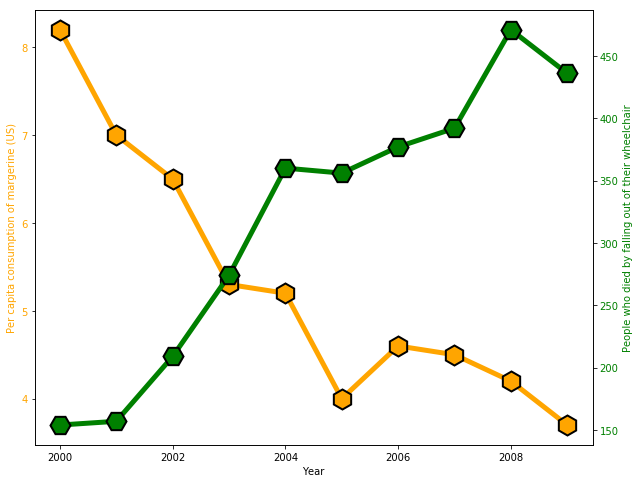

In [92]:
#http://tylervigen.com/view_correlation?id=1346

fig, margerineChart = plt.subplots()
fig.set_size_inches(10, 8)

#Margerine Chart
margerineChart.set_xlabel('Year')
margerineChart.set_ylabel('Per capita consumption of margerine (US)', color='orange')
margerineChart.plot(timeData, margerineData, color='orange', lw=5, marker='h', ms=20, mec='black', mew=2)
margerineChart.tick_params(axis='y', labelcolor='orange')

#Wheelchair chart
wheelchairChart = margerineChart.twinx()
wheelchairChart.set_ylabel('People who died by falling out of their wheelchair', color='green')
wheelchairChart.plot(timeData, wheelchairData, color='green', lw=5, marker='H', ms=20, mec='black', mew=2)
wheelchairChart.tick_params(axis='y', labelcolor='green')